# Description

* number libraries = 1
* isotope incorp: 0% for all taxa (baseline)
* abundance distribution: lognormal

## Goals

* assess how absolute abundance alters the distribution of amplicon fragments
  * abs abund values:
    * 1e9, 5e9, 1e10

# Init

In [1]:
workDir = '/home/nick/notebook/SIPSim/dev/bac_genome_all/nl1/absAbund/'
copyDir = '/home/nick/notebook/SIPSim/dev/bac_genome_all/nl1/fragLen/'
baseDir = '/home/nick/notebook/SIPSim/dev/bac_genome_all/'
SIPSimExe = '/home/nick/notebook/SIPSim/SIPSim'

In [4]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [5]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)
library(data.table)


Attaching package: ‘dplyr’

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: grid
data.table 1.9.4  For help type: ?data.table
*** NB: by=.EACHI is now explicit. See README to restore previous behaviour.

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, last



In [6]:
if not os.path.isdir(workDir):
    os.mkdir(workDir)

# Simulating gradient communities

In [7]:
comm_file = 'comm-n1-logn.txt'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

[1] 100
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000006 0.003088 0.010750 0.082640 0.040510 8.164000 
[1] 1392199


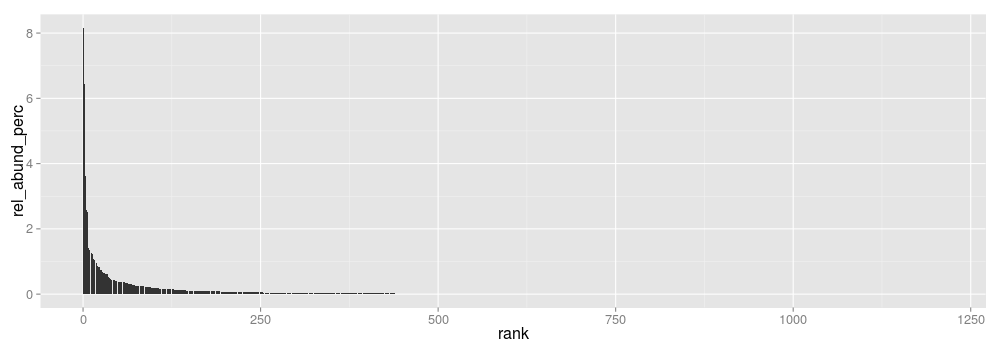

In [8]:
%%R -i workDir -w 1000 -h 350 
# plotting the abundance distribution
setwd(workDir)

tbl = read.delim('comm-n1-logn.txt', sep='\t')

print(sum(tbl$rel_abund_perc))
print(summary(tbl$rel_abund_perc))
print(max(tbl$rel_abund_perc) / min(tbl$rel_abund_perc))

# plotting
ggplot(tbl, aes(rank, rel_abund_perc)) +
    geom_bar(stat='identity') +
    theme( text = element_text(size=16))

# Simulating isotope incorporation

In [9]:
comm_file = 'incorp-n1-logn.txt'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

In [11]:
comm_file = 'incorp.config'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

In [12]:
!cd $workDir; \
    $SIPSimExe isoIncorp \
    comm-n1-logn.txt \
    incorp.config \
    > incorp-n1-logn.txt

In [13]:
!cd $workDir; head incorp-n1-logn.txt

library	taxon_name	distribution_index	distribution	weight	param	param_value
1	Dyella_japonica_A8	1	uniform	1.0	start	8.77626044816e-06
1	Dyella_japonica_A8	1	uniform	1.0	end	9.83134088922e-06
1	Sulfurospirillum_deleyianum_DSM_6946	1	uniform	1.0	start	8.28667487953e-06
1	Sulfurospirillum_deleyianum_DSM_6946	1	uniform	1.0	end	6.37507519633e-06
1	Acinetobacter_oleivorans_DR1	1	uniform	1.0	start	6.45787008223e-06
1	Acinetobacter_oleivorans_DR1	1	uniform	1.0	end	8.81781573978e-06
1	Pelagibacterium_halotolerans_B2	1	uniform	1.0	start	4.11103051824e-06
1	Pelagibacterium_halotolerans_B2	1	uniform	1.0	end	6.23871288891e-06
1	Symbiobacterium_thermophilum_IAM_14863	1	uniform	1.0	start	8.76944948894e-06


# Simulating gradient fractions

In [14]:
comm_file = 'fracs-n1-logn.txt'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

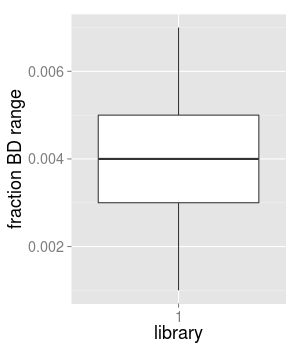

In [17]:
%%R -i workDir -h 350 -w 300 
# plotting the abundance distribution
setwd(workDir)

tbl = read.delim('fracs-n1-logn.txt', sep='\t')
tbl$library = as.character(tbl$library)


ggplot(tbl, aes(library, fraction_size)) +
    geom_boxplot() +
    labs(y='fraction BD range') +
    theme( 
        text = element_text(size=18),
        axis.title.y = element_text(vjust=1)
    )

# Simulating amplicon fragments & calculating GC

## Skewed-normal fragment length distribution 

* default params 
  * I'm explicitly setting the defaults in case they change later
  * no real size restrictions

In [15]:
comm_file = 'ampFragGC_skewN90-25-n5-nS.pkl'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

## Creating OTU table: abs-abund = 1e9

In [ ]:
!cd $workDir; \
    $SIPSimExe OTU_sim \
    ampFragGC_skewN90-25-n5-nS.pkl \
    comm-n1-logn.txt \
    incorp-n1-logn.txt \
    fracs-n1-logn.txt \
    --abs_abund 1e9 \
    2> OTU-n1-logn_skewN90-25-n5-nS_A1e9.log \
    > OTU-n1-logn_skewN90-25-n5-nS_A1e9.txt

## Creating OTU table: abs-abund = 2e9

In [ ]:
!cd $workDir; \
    $SIPSimExe OTU_sim \
    ampFragGC_skewN90-25-n5-nS.pkl \
    comm-n1-logn.txt \
    incorp-n1-logn.txt \
    fracs-n1-logn.txt \
    --abs_abund 2e9 \
    2> OTU-n1-logn_skewN90-25-n5-nS_A2e9.log \
    > OTU-n1-logn_skewN90-25-n5-nS_A2e9.txt

## Creating OTU table: abs-abund = 4e10

In [ ]:
!cd $workDir; \
    $SIPSimExe OTU_sim \
    ampFragGC_skewN90-25-n5-nS.pkl \
    comm-n1-logn.txt \
    incorp-n1-logn.txt \
    fracs-n1-logn.txt \
    --abs_abund 4e9 \
    2> OTU-n1-logn_skewN90-25-n5-nS_A4e9.log \
    > OTU-n1-logn_skewN90-25-n5-nS_A4e9.txt

## Plotting OTU tables


In [ ]:
%%R -i workDir

# loading file
inFiles = c('OTU-n1-logn_skewN90-25-n5-nS_A1e9.txt',
            'OTU-n1-logn_skewN90-25-n5-nS_A2e9.txt',
            'OTU-n1-logn_skewN90-25-n5-nS_A4e9.txt')

inFiles = sapply(inFiles, function(x){
            paste(c(workDir, x), collapse='/')
    })

tbls = list()
for (fileName in names(inFiles)){
    tbls[[fileName]] = read.csv(fileName, sep='\t')
    }
tbl = do.call(rbind, tbls)
tbl$abs_abund = as.numeric(gsub('.+-nS_A|\\.txt\\.[0-9]+', '', rownames(tbl)))

tbl = tbl %>% 
    separate(fractions, into = c('BD_min','BD_max'), sep='-', convert=TRUE) %>%
    filter(BD_min != 1.795)

In [ ]:
%%R
## BD for G+C of 0 or 100
BD.GCp0 = 0 * 0.098 + 1.66
BD.GCp100 = 1 * 0.098 + 1.66

In [ ]:
%%R -w 800 -h 500
# plotting absolute abundances

tbl.s = tbl %>%
    group_by(abs_abund, BD_min) %>%
    summarize(total_count = sum(count))


## plot
p = ggplot(tbl.s, aes(BD_min, total_count)) +
    geom_area(stat='identity', alpha=0.5, position='dodge') +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16) 
    )
p

In [ ]:
%%R -w 800 -h 500

p + scale_y_log10()

In [ ]:
%%R
tax_order = tbl %>%
    group_by(taxon) %>%
    summarize(taxon_total_abund = sum(count)) %>%
    as.data.frame

tax_order = unique(tax_order[order(tax_order$taxon_total_abund, decreasing=T),'taxon']) 

tbl$taxon = factor(tbl$taxon, levels=sort(unique(tbl$taxon), decreasing=T))
tbl$taxon_group = factor(tbl$taxon, levels=tax_order)

In [ ]:
%%R -w 800 -h 600
# plotting relative abundances

## plot
p = ggplot(tbl, aes(BD_min, count, fill=taxon, order=taxon_group)) +
    geom_area(stat='identity', alpha=0.5, position='fill') +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16),
        legend.position = 'none'
    )
p

In [ ]:
%%R -w 800 -h 500
# plotting number of taxa at each BD

tbl.nt = tbl %>%
    filter(count > 0) %>%
    group_by(abs_abund, BD_min) %>%
    summarize(n_taxa = n())

## plot
p = ggplot(tbl.nt, aes(BD_min, n_taxa)) +
    geom_area(stat='identity', alpha=0.5, position='dodge') +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density', y='Number of taxa') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16),
        legend.position = 'none'
    )
p

In [ ]:
%%R -h 400 -w 650

tbl.s = tbl %>%
    group_by(abs_abund, taxon) %>%
    summarize( total_abund = sum(count) ) %>%
    mutate(rank = min_rank(desc(total_abund))) %>%
    arrange(rank)

ggplot(tbl.s, aes(rank, total_abund)) +
    geom_bar(stat='identity') +
    facet_grid(abs_abund ~ .) +
    theme( text = element_text(size=16))

In [ ]:
%%R -w 700 -h 650
# plotting most abundant taxa

tbl.s.a10 = tbl.s %>%
    filter(rank <= 10)

tbl.a10 = tbl %>%
    filter(taxon %in% tbl.s.a10$taxon)

## plot
p = ggplot(tbl.a10, aes(BD_min, count, fill=taxon, group=taxon)) +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16),
        legend.position = 'none'
    )
p1 = p + geom_area(stat='identity', alpha=0.5, position='dodge') 
p2 = p + geom_area(stat='identity', alpha=0.5, position='fill') 

grid.arrange(p1, p2, ncol=1)

## Measuring the BD range vs total abundance for each taxon

In [ ]:
%%R
tbl.bdr = tbl %>%
    mutate(
           GC_min = (BD_min - 1.66) / 0.098 * 100,
           GC_max = (BD_max - 1.66) / 0.098 * 100
          ) %>%
    group_by(abs_abund, taxon) %>%
    filter(count > 0) %>%
    summarize(
              GC_range = max(GC_max) - min(GC_min),
              BD_range = max(BD_max) - min(BD_min),
              total_abund = sum(count)
            )  

# plotting 
ggplot(tbl.bdr, aes(total_abund, BD_range)) +
    geom_point(alpha=0.75, shape='O') +
    geom_smooth(method='lm') +
    scale_x_log10() +
    facet_grid(abs_abund ~ .) +
    theme(
        text = element_text(size=16)
        )

In [ ]:
%%R -w 800
# plotting boxplots
tbl.bdr$abs_abund = as.character(tbl.bdr$abs_abund)
tbl.bdr$abs_abund = factor(tbl.bdr$abs_abund, levels=c('1e+09','5e+09','1e+10'))

p1 = ggplot(tbl.bdr, aes(abs_abund, BD_range)) +
    geom_boxplot() +
    labs(y='Range of BD for fragments') +
    theme(
        text = element_text(size=16)
        )

p2 = ggplot(tbl.bdr, aes(abs_abund, GC_range)) +
    geom_boxplot() +
    labs(y='Range of %GC for fragments') +
    theme(
        text = element_text(size=16)
        )

grid.arrange(p1, p2, ncol=2)

In [ ]:
%%R
tbl.bdr %>%
    group_by(abs_abund) %>%
    summarize(
        median_BD_range = median(BD_range),
        median_GC_range = median(GC_range)
    )

__Notes:__



# Subsampling OTU tables

* subsample sizes:
  * 1k
  * 10k
  * 50k

In [ ]:
!cd $workDir; \
    SIPSim OTU_subsample \
    OTU-n1-logn_skewN90-25-n5-nS_A1e10.txt \
    --dist_params low:1000,high:1000 \
    > OTU-n1-logn_skewN90-25-n5-nS_A1e10_sub1k.txt

!cd $workDir; \
    SIPSim OTU_subsample \
    OTU-n1-logn_skewN90-25-n5-nS_A1e10.txt \
    --dist_params low:10000,high:10000 \
    > OTU-n1-logn_skewN90-25-n5-nS_A1e10_sub10k.txt
    
!cd $workDir; \
    SIPSim OTU_subsample \
    OTU-n1-logn_skewN90-25-n5-nS_A1e10.txt \
    --dist_params low:50000,high:50000 \
    > OTU-n1-logn_skewN90-25-n5-nS_A1e10_sub50k.txt

In [ ]:
%%R -i workDir

# loading file
inFiles = c('OTU-n1-logn_skewN90-25-n5-nS_A1e10_sub1k.txt',
            'OTU-n1-logn_skewN90-25-n5-nS_A1e10_sub10k.txt',
            'OTU-n1-logn_skewN90-25-n5-nS_A1e10_sub50k.txt')

inFiles = sapply(inFiles, function(x){
            paste(c(workDir, x), collapse='/')
    })

tbls = list()
for (fileName in names(inFiles)){
    tbls[[fileName]] = read.csv(fileName, sep='\t')
    }
tbl = do.call(rbind, tbls)
tbl$abs_abund = gsub('.+_sub|\\.txt\\.[0-9]+', '', rownames(tbl))

tbl = tbl %>% 
    separate(fractions, into = c('BD_min','BD_max'), sep='-', convert=TRUE) %>%
    filter(BD_min != 1.795)

In [ ]:
%%R -w 800 -h 500
# plotting absolute abundances

tbl.s = tbl %>%
    group_by(abs_abund, BD_min) %>%
    summarize(total_count = sum(count))


## plot
p = ggplot(tbl.s, aes(BD_min, total_count)) +
    geom_area(stat='identity', alpha=0.5, position='dodge') +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16) 
    )
p

In [ ]:
%%R
tax_order = tbl %>%
    group_by(taxon) %>%
    summarize(taxon_total_abund = sum(count)) %>%
    as.data.frame

tax_order = unique(tax_order[order(tax_order$taxon_total_abund, decreasing=T),'taxon']) 

tbl$taxon = factor(tbl$taxon, levels=sort(unique(tbl$taxon), decreasing=T))
tbl$taxon_group = factor(tbl$taxon, levels=tax_order)

In [ ]:
%%R -w 800 -h 650
# plotting abundance

tbl$abs_abund = factor(tbl$abs_abund, levels=c('1k','10k','50k'))

## plot
p = ggplot(tbl, aes(BD_min, count, fill=taxon, order=taxon_group)) +
    geom_area(stat='identity', alpha=0.5, position='fill') +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16),
        legend.position = 'none'
    )
p